In [ ]:
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
x_train_flattened = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test_flattened = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

In [ ]:
model = Sequential()
model.add(Dense(412, activation='relu', input_shape=(32*32*3, ), kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 412)               1266076   
                                                                 
 dropout (Dropout)           (None, 412)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               105728    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,374,374
Trainable params: 1,374,374
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [ ]:
ckpt_model = 'cifar10.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model,
                             monitor = 'val_accuracy',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')
early_stopping = EarlyStopping(patience = 5,
                               monitor = 'val_loss',
                               restore_best_weights = True)
callbacks_list = [checkpoint, early_stopping]

In [ ]:
print('Starting training...')

history = model.fit(x_train_flattened,
                    y_train,
                    validation_data = (x_test_flattened, y_test),
                    epochs = 100,
                    batch_size = 36,
                    callbacks = callbacks_list,
                    verbose = 1)

Starting training...
Epoch 1/100
1389/1389 [==============================] - ETA: 0s - loss: 2.0918 - accuracy: 0.2783
Epoch 1: val_accuracy improved from -inf to 0.37560, saving model to cifar10.best.hdf5
1389/1389 [==============================] - 37s 25ms/step - loss: 2.0918 - accuracy: 0.2783 - val_loss: 1.8913 - val_accuracy: 0.3756
Epoch 2/100
1388/1389 [============================>.] - ETA: 0s - loss: 1.9197 - accuracy: 0.3503
Epoch 2: val_accuracy improved from 0.37560 to 0.39150, saving model to cifar10.best.hdf5
1389/1389 [==============================] - 24s 17ms/step - loss: 1.9197 - accuracy: 0.3503 - val_loss: 1.8108 - val_accuracy: 0.3915
Epoch 3/100
1386/1389 [============================>.] - ETA: 0s - loss: 1.8495 - accuracy: 0.3766
Epoch 3: val_accuracy improved from 0.39150 to 0.41100, saving model to cifar10.best.hdf5
1389/1389 [==============================] - 27s 19ms/step - loss: 1.8494 - accuracy: 0.3767 - val_loss: 1.7531 - val_accuracy: 0.4110
Epoch 4/10

In [ ]:
loss, accuracy = model.evaluate(x_test_flattened, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.3547301292419434
Test accuracy: 0.5590999722480774


In [ ]:
def plot_metric(history, metric, metric_name):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    x = list(range(1, len(test_metric) + 1))
    plt.plot(x, test_metric, color='red', label='test ' + metric_name)
    plt.plot(x, train_metric, label='training ' + metric_name)
    plt.xlabel('Epoch')
    plt.ylabel(metric_name.capitalize())
    plt.title(metric_name.capitalize() + ' vs. Epoch')
    plt.legend()

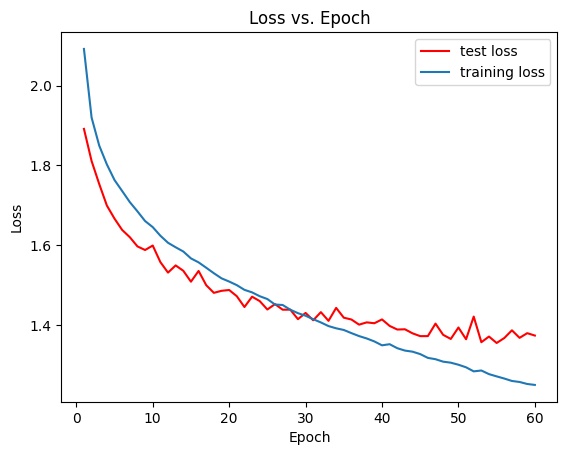

In [ ]:
plot_metric(history, 'loss', 'loss')

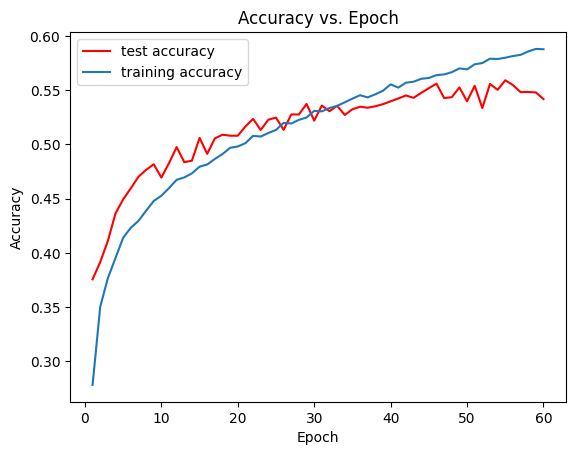

In [ ]:
plot_metric(history, 'accuracy', 'accuracy')

In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1], accuracy * 100))

accuracy: 55.91%
